<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing required pakages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#downloading co2_emission data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-01-27 17:04:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2020-01-27 17:04:29 (2.78 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
#reading data
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head(n=13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
#desciptive exploration on dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
#selecting some important features to explore
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


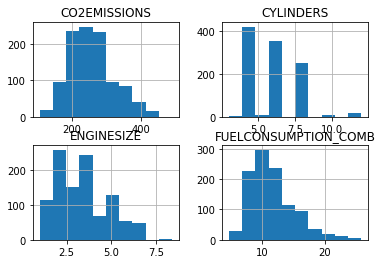

In [13]:
#plotiing them now:-
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

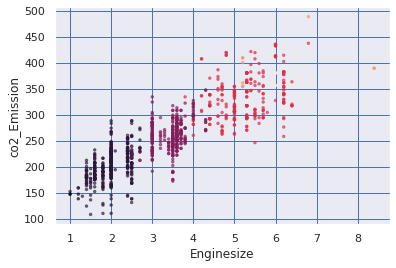

In [67]:
#Now, lets plot each of these features vs the Emission, to see how linear is their relation

plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,c = df['CYLINDERS'],alpha=0.6,s=6)#'s' is for size, and alpha for tranperency of datapoints
plt.xlabel('Enginesize',)#catagorical-colors are plotted here based on the CYLINDERS
plt.ylabel('co2_Emission')
plt.grid(color='b')
plt.show()

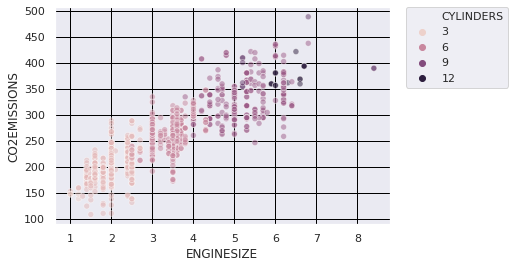

In [64]:
#more exploratory ploting with seaborn 
import seaborn as sns; sns.set()
ax = sns.scatterplot(cdf.ENGINESIZE,cdf.CO2EMISSIONS,
                     hue=df['CYLINDERS'],alpha=0.5)#alpha for transperency
sns.set_style("darkgrid")#grey colored grids
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#for plotting the lgend outside the box
plt.grid(c='black')#balck colored grid lines


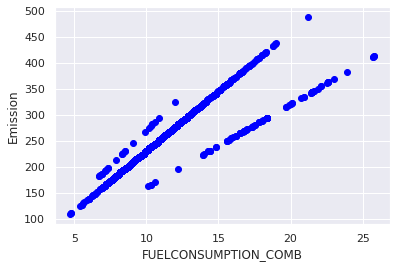

In [69]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()
#as we know that the co2_emission increases with respect to the fuel_combution

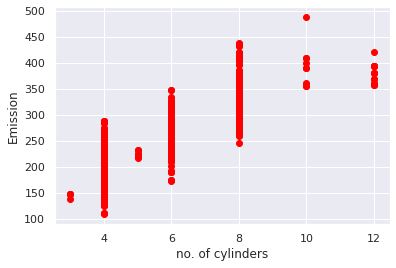

In [70]:
#as no. of cylinders increase then emission also increse
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("no. of cylinders")
plt.ylabel("Emission")
plt.show()

In [0]:
#Creating train and test dataset
"""This means that we know the outcome of each data point in this dataset, making it great to test with! And 
since this data has not been used to train the model.
the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.
Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 
We create a mask to select random rows using np.random.rand() function:
"""
msk = np.random.rand(len(df)) < 0.8 #mask to select random rows upto 80% of dataset
train = cdf[msk]#used above mask for the training porpose ,as its 80%,but masking is here happen wrt cdf(dataset with important coulumns)
test = cdf[~msk]#negation of mask(20%) used for test 

In [72]:
#Modeling Using sklearn package to model data.
"""
As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters,
and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.
"""
from sklearn import linear_model
regr = linear_model.LinearRegression()#fetching LinearRgresssion
train_x = np.asanyarray(train[['ENGINESIZE']])#training features as ENGINESIZE
train_y = np.asanyarray(train[['CO2EMISSIONS']])#training answers
regr.fit (train_x, train_y)#fiting train answers and features to model
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.67883958]]
Intercept:  [126.15356544]


Text(0, 0.5, 'Emission')

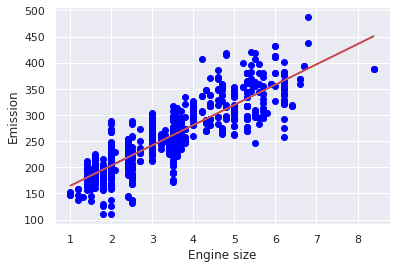

In [73]:
#Plot outputs
#we can plot the fit line over the data:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')#as y(predicted)=coef(train_x)+intercept or we can say:-y=mX+c 
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [74]:
#evaluation
"""
Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
R-squared is not error, but is a popular metric for accuracy of your model. 
It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
"""
from sklearn.metrics import r2_score #importing r2_score for evaluation

test_x = np.asanyarray(test[['ENGINESIZE']])#test_features
test_y = np.asanyarray(test[['CO2EMISSIONS']])#test_actual_answers
test_y_hat = regr.predict(test_x)#predicted values from model as y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )#r2_score supplied with test_predicted_ans & test_actual_answers

Mean absolute error: 25.29
Residual sum of squares (MSE): 1075.30
R2-score: 0.64
